https://zhuanlan.zhihu.com/p/35150541

In [22]:
from sympy import * 
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
a = Symbol('a')
b = Symbol('b')
c = Symbol('c')
t = Symbol('t')
w_1 = Symbol('w_1')
w_2 = Symbol('w_2')

In [4]:

f = (2/3)*x**2+(1/3)*x**2+x+x+1


In [25]:
f=sin(w_1*t)*sin(w_2*t)
f.simplify()

sin(t*w_1)*sin(t*w_2)

In [21]:
f.simplify()

4*sin(t*w_1 + z)

In [5]:
f.simplify()

1.0*x**2 + 2*x + 1

In [6]:
f=(x+1)**2
expand(f)

x**2 + 2*x + 1

In [8]:
f1 = 2*x -y+z-10
f2 = 3*x +2*y -z -16
f3 = x+ 6*y -z -28

solve({f1,f2,f3})

{x: 46/11, y: 56/11, z: 74/11}

In [9]:
f = (x+1)**2 +1
limit(f,x,a-1)

a**2 + 1

In [10]:
f=sin(x)/x
limit(f,x,0)

1

In [11]:
diff(sin(2*x),x)

2*cos(2*x)

In [3]:
diff(1/x,x)

-1/x**2

In [4]:
diff(2/x)

-2/x**2

In [12]:
sin(2*x).diff(x)

2*cos(2*x)

In [8]:
(1/(x-2)).diff(x)

-1/(x - 2)**2

In [13]:
diff(sin(2*x),x,2)

-4*sin(2*x)

In [14]:
diff(sin(2*x), x, 3)

-8*cos(2*x)

In [11]:
x = symbols("x", real=True) # 定义符号x 为实数 
eq1 = dsolve(f(x).diff(x) + f(x)**2 + f(x), f(x)) 

NameError: name 'f' is not defined

In [19]:
f = x**2 + 1
integrate(f, (x, -1, 1))

8/3

In [20]:
integrate(exp(x), (x, -oo, 0))

1

In [21]:
f = 3*x**2 + 1
integrate(f, x)

x**3 + x

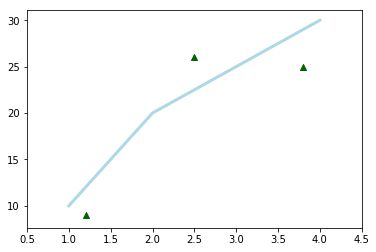

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

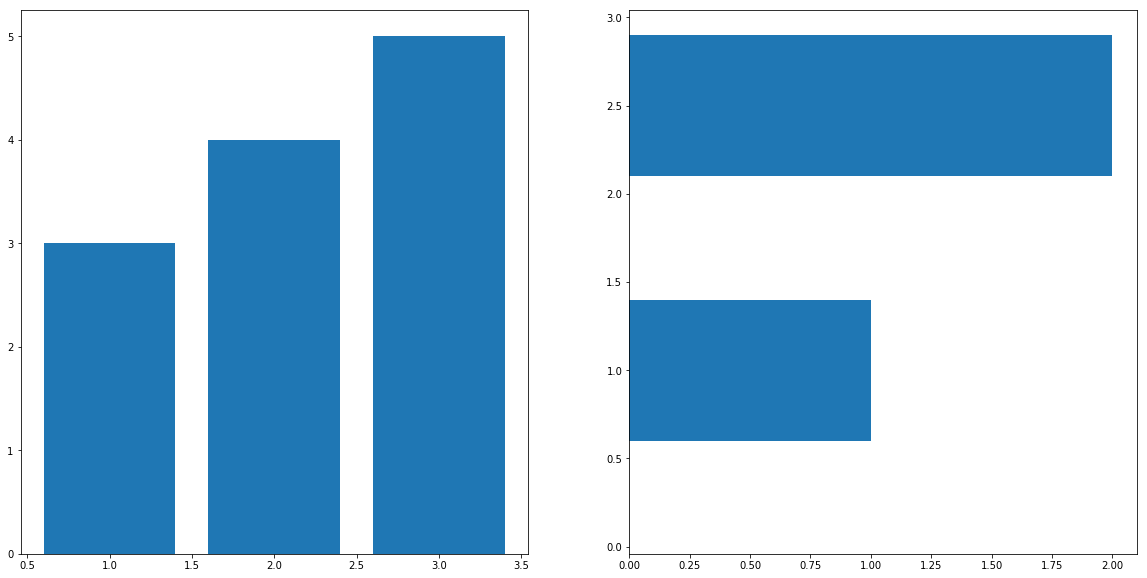

In [24]:
# Initialize the plot
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# or replace the three lines of code above by the following line: 
#fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])

# Show the plot
plt.show()

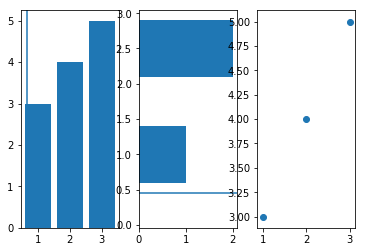

In [26]:
# Initialize the plot
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# Plot the data
ax1.bar([1,2,3],[3,4,5])
ax2.barh([0.5,1,2.5],[0,1,2])
ax2.axhline(0.45)
ax1.axvline(0.65)
ax3.scatter([1,2,3],[3,4,5])

# Show the plot
plt.show()

https://vlight.me/2018/05/01/Numerical-Python-Ordinary-Differential-Equations/

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [28]:
sympy.init_printing()

接下来，我们可以非常自然地定义 ODE，只需在 ODE 的左侧创建一个 SymPy 表达式（当将公式写成 dT(t)dt+k(T(t)−Ta)=0 的形式时）。这里，为了表示函数 T(t)，我们可以使用 Sympy 函数对象 T。使用函数调用语法 T(t) ，应用符号 t 到 T，得到一个应用函数对象，这样我们就可以使用 sympy.diff 或 diff 方法对 T(t) 表达式求导：

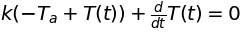

In [33]:
t, k, T0, Ta = sympy.symbols('t, k, T_0, T_a')
T = sympy.Function('T')
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode)

In [36]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [39]:
ics = {T(0): T0}

C_eq = sympy.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_eq

在本例中，C1 的等式很容易求解，但为了通用性，我们使用 sympy.solve 解决它。结果是一个解的列表（在本例中是一个仅有一个解的列表）。我们可以将 C1 的解代入 ODE 的一般解，以获得与给定初始条件相对应的特解：

In [40]:
C_sol = sympy.solve(C_eq)
ode_sol.subs(C_sol[0])

In [42]:

def apply_ics(sol, ics, x, known_params):
	"""
	Apply the initial conditions (ics), given as a dictionary on
	the form ics = {y(0): y0, y(x).diff(x).subs(x, 0): yp0, ...},
	to the solution of the ODE with independent variable x.
	The undetermined integration constants C1, C2, ... are extracted
	from the free symbols of the ODE solution, excluding symbols in
	the known_params list.
	"""

	free_params = sol.free_symbols - set(known_params)
	eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
			for n in range(len(ics))]
	sol_params = sympy.solve(eqs, free_params)

	return sol.subs(sol_params)

利用这个函数，我们可以更方便地挑出一个满足一组初始条件 ODE 的特解，给定相同 ODE 的一般解。对于前面的示例，我们有：

In [43]:
ode_sol


In [44]:
apply_ics(ode_sol, ics, t, [k, Ta])

我们目前看到的例子几乎是平凡的，但同样的方法可以用来处理任何 ODE 问题，当然，这不能保证找到解。作为稍微复杂一些的问题的例子，考虑阻尼谐振子的 ODE，它是形式为 d2x(t)dx2+2γω0dx(t)dt+ω20x(t)=0 的二阶 ODE，其中 x(t) 是振荡器在 t 时刻的位置，ω0 是无阻尼情况的频率，γ 是阻尼比。我们首先定义所需的符号并构造 ODE，然后通过调用 sympy.dsolve 来找到一般解：

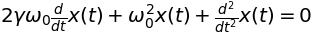

In [49]:
t, omega0, gamma = sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function('x')
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2*x(t)
sympy.Eq(ode)

In [52]:
ode_sol= sympy.dsolve(ode)
ode_sol

由于这是一个二阶 ODE，因此在通用解中有两个待定积分常数。我们需要为位置 x(0) 和速度 dx(t)dt∣∣t=0 指定初始条件，以便为 ODE 指定一个特解。为此，创建一个包含这些初始条件的字典，并使用 apply_ics 将其应用于 ODE 解：

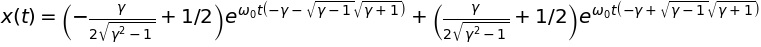

In [53]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

In [55]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical
    

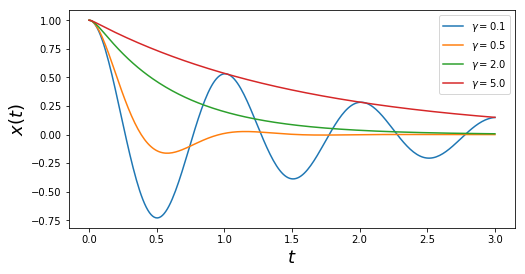

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
         if g == 1:
             x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
         else:
             x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
             ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18)
ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()

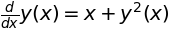

In [64]:
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2 + x
sympy.init_printing()
sympy.Eq(y(x).diff(x), f)


In [65]:
sympy.dsolve(y(x).diff(x) - f)